<a href="https://colab.research.google.com/github/sunaina1701/predicting-honeybee-health-EDA-Analysis-/blob/main/molecular_fingerprinting_using_python_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd

df = pd.DataFrame(
   data={
      'smiles': [
          'CC(=O)OC1=CC=CC=C1C(=O)O', # Added comma
          'CC(=O)OC1=CC=CC=C1C(=O)[O-].CC(=O)OC1=CC=CC=C1C(=O)[O-].[Ca+2]', # Added comma
          'CC(=O)OC1=CC=CC=C1C(=O)O.C1CCN(CC1)C2=NC(=NC3=C2N=C(N=C3N4CCCCC4)N(CCO)CCO)N(CCO)CCO', # Added comma
          'CC(=O)NC1=CC=C(C=C1)O.CC(=O)OC1=CC=CC=C1C(=O)O.CN1C=NC2=C1C(=O)N(C(=O)N2C)C',  # Added comma
          'CC(C)CC1(C(=O)NC(=O)NC1=O)CC=C.CC(=O)OC1=CC=CC=C1C(=O)O.CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC)O[C@H]3[C@H](C=C4)O.CN1C=NC2=C1C(=O)N(C(=O)N2C)C' # Added comma
      ],
      'mw': [
          180.16,398.4,684.8,525.5,898
      ]
   }
)
df

,smiles,mw
0,CC(=O)OC1=CC=CC=C1C(=O)O,180.16
1,CC(=O)OC1=CC=CC=C1C(=O)[O-].CC(=O)OC1=CC=CC=C1...,398.40
2,CC(=O)OC1=CC=CC=C1C(=O)O.C1CCN(CC1)C2=NC(=NC3=...,684.80
3,CC(=O)NC1=CC=C(C=C1)O.CC(=O)OC1=CC=CC=C1C(=O)O...,525.50
4,CC(C)CC1(C(=O)NC(=O)NC1=O)CC=C.CC(=O)OC1=CC=CC...,898.00


,smiles,mw,ROMol
0,CC(=O)OC1=CC=CC=C1C(=O)O,180.16,
1,CC(=O)OC1=CC=CC=C1C(=O)[O-].CC(=O)OC1=CC=CC=C1...,398.40,
2,CC(=O)OC1=CC=CC=C1C(=O)O.C1CCN(CC1)C2=NC(=NC3=...,684.80,
3,CC(=O)NC1=CC=C(C=C1)O.CC(=O)OC1=CC=CC=C1C(=O)O...,525.50,
4,CC(C)CC1(C(=O)NC(=O)NC1=O)CC=C.CC(=O)OC1=CC=CC...,898.00,

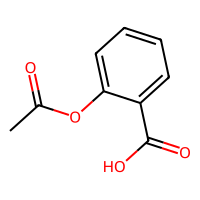
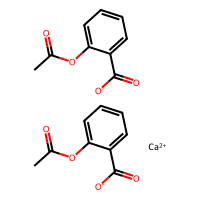
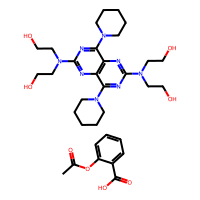
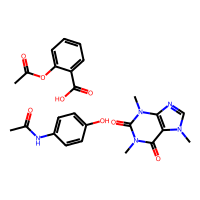
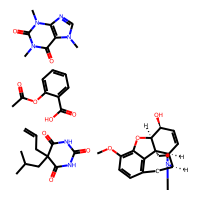

In [ ]:
#Molecule Representation
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles')
df

# MACCS Fingerprints

MACCS (Molecular ACCess System) fingerprints are one of the most commonly used representations to characterize molecules,especially in the field of pharmacology. They are based on the presence of specific substructures.

,smiles,mw,ROMol,maccs
0,CC(=O)OC1=CC=CC=C1C(=O)O,180.16,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CC(=O)OC1=CC=CC=C1C(=O)[O-].CC(=O)OC1=CC=CC=C1...,398.40,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,CC(=O)OC1=CC=CC=C1C(=O)O.C1CCN(CC1)C2=NC(=NC3=...,684.80,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CC(=O)NC1=CC=C(C=C1)O.CC(=O)OC1=CC=CC=C1C(=O)O...,525.50,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CC(C)CC1(C(=O)NC(=O)NC1=O)CC=C.CC(=O)OC1=CC=CC...,898.00,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

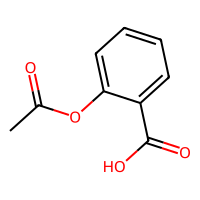
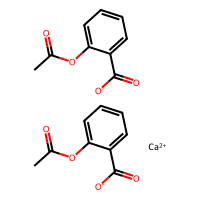
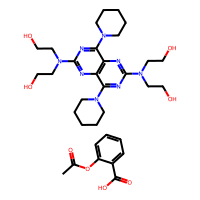
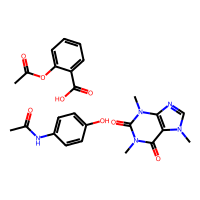
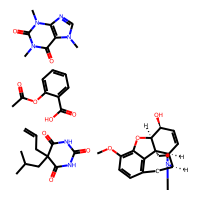

In [ ]:
from rdkit.Chem import MACCSkeys

def maccs_fp(mol):
   return MACCSkeys.GenMACCSKeys(mol)

df['maccs'] = df['ROMol'].apply(maccs_fp)
df

# Morgan Fingerprints

Another widely used representation is the Morgan fingerprint, which is based on the analysis of the neighborhood of atoms within a molecule.

,smiles,mw,ROMol,maccs,morgan
0,CC(=O)OC1=CC=CC=C1C(=O)O,180.16,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
1,CC(=O)OC1=CC=CC=C1C(=O)[O-].CC(=O)OC1=CC=CC=C1...,398.40,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
2,CC(=O)OC1=CC=CC=C1C(=O)O.C1CCN(CC1)C2=NC(=NC3=...,684.80,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
3,CC(=O)NC1=CC=C(C=C1)O.CC(=O)OC1=CC=CC=C1C(=O)O...,525.50,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
4,CC(C)CC1(C(=O)NC(=O)NC1=O)CC=C.CC(=O)OC1=CC=CC...,898.00,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."

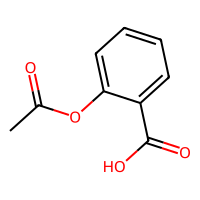
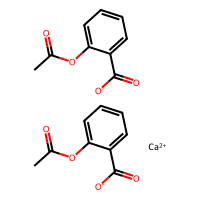
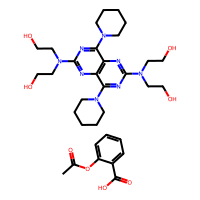
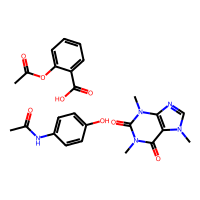
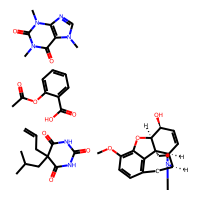

In [ ]:
from rdkit.Chem import AllChem

def morgan_fp(mol):
   morgan = AllChem.GetMorganGenerator(radius=2, fpSize=512)
   return morgan.GetFingerprint(mol)

df['morgan'] = df['ROMol'].apply(morgan_fp)
df